# Prediction using Random Forest Classifier

## **Random Forest Classifier with Python Scikit Learn**
Random Forest lives up to its name : simply, made up of several trees. It is a commonly-used machine learning algorithm. In more details, Random Forest is a set of decision trees built on random samples with different policies for splitting a node. Due to which it also gives a better result than Decision Tree. Random decision forests correct for decision trees' habit of overfitting.

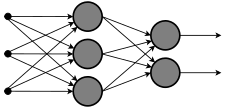

## **Problem statement**
In this task we will predict the winner of the match depending upon the teams, venue, toss, city and team who won the toss.

# **Step 1** : Importing all libraries required in this notebook


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# **Step 2** : Reading data from csv file 

In [ ]:
matches = pd.read_csv("https://raw.githubusercontent.com/Deadshot-07/IPL-EDA/T/matches.csv")
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
df = pd.DataFrame(matches)

In [ ]:
df = df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]

## Data summary

In [ ]:
df.shape

(756, 7)

In [ ]:
df.columns

Index(['team1', 'team2', 'city', 'toss_decision', 'toss_winner', 'venue',
       'winner'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    object
 1   team2          756 non-null    object
 2   city           749 non-null    object
 3   toss_decision  756 non-null    object
 4   toss_winner    756 non-null    object
 5   venue          756 non-null    object
 6   winner         752 non-null    object
dtypes: object(7)
memory usage: 41.5+ KB


# **Step 3** :  Preparing the data


Checking for null values in dataset

In [ ]:
df.isna().sum()

team1            0
team2            0
city             7
toss_decision    0
toss_winner      0
venue            0
winner           4
dtype: int64

Handling the null values

In [ ]:
df['city'].fillna(value = 'Dubai', inplace = True)

In [ ]:
df.drop (df[df['winner'].isnull()].index , inplace = True)

In [ ]:
df.isna().sum()

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [ ]:
print(df['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


Correcting the data

In [ ]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df["team2"] = df["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["team1"]=df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["winner"] = df["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["toss_winner"] = df["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [ ]:
print(df['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Delhi Capitals']


In [ ]:
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,field,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiants,Pune,field,Rising Pune Supergiants,Maharashtra Cricket Association Stadium,Rising Pune Supergiants
2,Gujarat Lions,Kolkata Knight Riders,Rajkot,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Rising Pune Supergiants,Kings XI Punjab,Indore,field,Kings XI Punjab,Holkar Cricket Stadium,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore


In [ ]:
var_mod = ['city','toss_decision','venue',]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,15,1,Royal Challengers Bangalore,28,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiants,27,1,Rising Pune Supergiants,21,Rising Pune Supergiants
2,Gujarat Lions,Kolkata Knight Riders,29,1,Kolkata Knight Riders,31,Kolkata Knight Riders
3,Rising Pune Supergiants,Kings XI Punjab,16,1,Kings XI Punjab,13,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,2,0,Royal Challengers Bangalore,17,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,24,1,Mumbai Indians,40,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,8,0,Chennai Super Kings,18,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,32,1,Delhi Capitals,0,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,32,1,Chennai Super Kings,0,Chennai Super Kings


In [ ]:
team_encode = {'Mumbai Indians':1,'Kolkata Knight Riders':2,'Royal Challengers Bangalore':3,'Delhi Capitals':4,'Chennai Super Kings':5,'Rajasthan Royals':6,'Delhi Daredevils':7,
               'Gujarat Lions':8,'Kings XI Punjab':9,'Sunrisers Hyderabad':10,'Rising Pune Supergiants':11,'Kochi Tuskers Kerala':12,'Pune Warriors':13,'Deccan Chargers':14}

encode = {'team1':team_encode , 'team2': team_encode,'toss_winner': team_encode, 'winner': team_encode}
df.replace(encode, inplace=True)
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,4,32,1,4,0,4
754,4,5,32,1,5,0,5


# **Step 4** : Training the Algorithm

In [ ]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[outcome], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")

In [ ]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.298%
Cross-Validation Score :[3.63846267 4.13913642 3.94292616 3.64142829 3.4573593 ]
Average RMSE: 3.763862567965539


# **Step 5** : Examples

In [ ]:
team1='Mumbai Indians'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp = [encode['team1'][team1],encode['team2'][team2],'14',encode['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encode.keys())[list(encode['team1'].values()).index(output)]}")

[['1' '10' '14' '10' '2' '1']]
The winner would be: Sunrisers Hyderabad


In [ ]:
team1='Rajasthan Royals'
team2='Royal Challengers Bangalore'
toss_winner='Rajasthan Royals'
inp = [encode['team1'][team1],encode['team2'][team2],'14',encode['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encode.keys())[list(encode['team1'].values()).index(output)]}")

[['6' '3' '14' '6' '2' '1']]
The winner would be: Royal Challengers Bangalore


In [ ]:
team1='Mumbai Indians'
team2='Pune Warriors'
toss_winner='Pune Warriors'
inp = [encode['team1'][team1],encode['team2'][team2],'14',encode['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encode.keys())[list(encode['team1'].values()).index(output)]}")

[['1' '13' '14' '13' '2' '1']]
The winner would be: Mumbai Indians


# **Step 6** : Predict Yourself 

Enter 
* Mumbai Indians : 1 
* Kolkata Knight Riders : 2
* Royal Challengers Bangalore : 3
* Delhi Capitals : 4
* Chennai Super Kings : 5
* Rajasthan Royals : 6
* Delhi Daredevils : 7
* Gujarat Lions : 8
* Kings XI Punjab :  9
* Sunrisers Hyderabad : 10
* Rising Pune Supergiants : 11
* Kochi Tuskers Kerala : 12
* Pune Warriors : 13
* Deccan Chargers : 14
      

In [ ]:
team1= input('Enter the team 1 : ')
team2= input('Enter the team 2 : ')
toss_winner= input('Enter the toss winner : ')
inp = [team1,team2,'14',toss_winner,'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encode.keys())[list(encode['team1'].values()).index(output)]}")